In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
covid_out = pd.read_csv('COVID-19_Outcomes_by_Testing_Cohorts__Cases__Hospitalizations__and_Deaths_20240603.csv')
covid_bo = pd.read_csv('DOHMH_COVID-19_Antibody-by-Borough_20240606.csv')
covid_waste = pd.read_csv('SARS-CoV-2_concentrations_measured_in_NYC_Wastewater_20240603.csv')
covid_case =pd.read_csv('DOHMH_Covid-19_Milestone_Data__New_Cases_of_Covid-19__7_Day_Average__20240606.csv')


In [3]:
covid_out.head()

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/29/2020,04/17/2020,9979,3386,527,96
1,04/29/2020,02/08/2020,1,0,0,0
2,04/29/2020,03/05/2020,63,5,3,1
3,04/29/2020,04/09/2020,9019,4803,1253,386
4,04/29/2020,04/03/2020,9389,5523,1688,582


In [4]:
covid_out= covid_out.drop('extract_date', axis=1)
print(covid_out.head())


  specimen_date  Number_tested  Number_confirmed  Number_hospitalized  \
0    04/17/2020           9979              3386                  527   
1    02/08/2020              1                 0                    0   
2    03/05/2020             63                 5                    3   
3    04/09/2020           9019              4803                 1253   
4    04/03/2020           9389              5523                 1688   

   Number_deaths  
0             96  
1              0  
2              1  
3            386  
4            582  


In [5]:
covid_out.head()

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/17/2020,9979,3386,527,96
1,02/08/2020,1,0,0,0
2,03/05/2020,63,5,3,1
3,04/09/2020,9019,4803,1253,386
4,04/03/2020,9389,5523,1688,582


In [6]:
print(covid_out.info)
print(covid_out.shape)
print(covid_out.head)
print(covid_out.isnull().sum())

<bound method DataFrame.info of        specimen_date  Number_tested  Number_confirmed  Number_hospitalized  \
0         04/17/2020           9979              3386                  527   
1         02/08/2020              1                 0                    0   
2         03/05/2020             63                 5                    3   
3         04/09/2020           9019              4803                 1253   
4         04/03/2020           9389              5523                 1688   
...              ...            ...               ...                  ...   
176143    11/18/2020          21551              2483                  163   
176144    03/17/2021          13961              1678                  166   
176145    03/09/2020            401                89                   36   
176146    09/10/2021          14573               503                   38   
176147    09/04/2020          18765              1648                  147   

        Number_deaths  
0      

In [7]:
covid_out.dtypes

specimen_date          object
Number_tested           int64
Number_confirmed        int64
Number_hospitalized     int64
Number_deaths           int64
dtype: object

In [8]:
covid_out['specimen_date']=covid_out['specimen_date'].astype('str')

In [9]:
covid_out['specimen_date']=pd.to_datetime(covid_out['specimen_date'], errors= 'coerce')

In [10]:
covid_out= covid_out.rename(columns={'specimen_date':'Sample Date'})

In [11]:
covid_out= covid_out.rename(columns={'Concentration SARS-CoV-2 gene target (N1 Copies/L)':'Concentration'})

In [12]:
covid_out.head()

,Sample Date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,2020-04-17,9979,3386,527,96
1,2020-02-08,1,0,0,0
2,2020-03-05,63,5,3,1
3,2020-04-09,9019,4803,1253,386
4,2020-04-03,9389,5523,1688,582


In [13]:
covid_out.isnull().sum()

Sample Date            169
Number_tested            0
Number_confirmed         0
Number_hospitalized      0
Number_deaths            0
dtype: int64

In [14]:
covid_out.dtypes

Sample Date            datetime64[ns]
Number_tested                   int64
Number_confirmed                int64
Number_hospitalized             int64
Number_deaths                   int64
dtype: object

In [15]:
len(covid_out.index)

176148

In [16]:
covid_out= covid_out.dropna()

In [17]:
covid_out.isnull().sum()

Sample Date            0
Number_tested          0
Number_confirmed       0
Number_hospitalized    0
Number_deaths          0
dtype: int64

In [18]:
len(covid_out.index)

175979

In [19]:
covid_out.sort_values(by= 'Sample Date')

,Sample Date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
39469,2020-01-01,1,1,0,0
37843,2020-01-01,1,1,0,0
35476,2020-01-01,1,1,0,0
49187,2020-01-01,2,2,0,1
44355,2020-01-01,1,1,0,0
...,...,...,...,...,...
175092,2021-09-27,5271,101,2,0
175566,2021-09-27,5271,101,11,0
174464,2021-09-28,123,3,0,0
175640,2021-09-28,123,3,1,0


In [20]:
print(covid_out['Sample Date'].max())
print(covid_out['Sample Date'].min())

2021-09-28 00:00:00
2020-01-01 00:00:00


In [21]:
covid_bo.head()

,demo_variable,NUM_PEOP_TEST,NUM_PEOP_POS,PERCENT_POSITIVE,TEST_RATE
0,BoroA_Bronx,441253,160926,0.365,31113.441
1,BoroB_Brooklyn,959956,342399,0.357,37499.702
2,BoroC_Manhattan,634633,169300,0.267,38965.473
3,BoroD_Queens,904965,328099,0.363,40151.820
4,BoroE_Staten_Island,164922,52555,0.319,34637.073


In [22]:
print(covid_bo.info)
print(covid_bo.shape)
print(covid_bo.head)
print(covid_bo.isnull().sum())

<bound method DataFrame.info of          demo_variable  NUM_PEOP_TEST  NUM_PEOP_POS  PERCENT_POSITIVE  \
0          BoroA_Bronx         441253        160926             0.365   
1       BoroB_Brooklyn         959956        342399             0.357   
2      BoroC_Manhattan         634633        169300             0.267   
3         BoroD_Queens         904965        328099             0.363   
4  BoroE_Staten_Island         164922         52555             0.319   

   TEST_RATE  
0  31113.441  
1  37499.702  
2  38965.473  
3  40151.820  
4  34637.073  >
(5, 5)
<bound method NDFrame.head of          demo_variable  NUM_PEOP_TEST  NUM_PEOP_POS  PERCENT_POSITIVE  \
0          BoroA_Bronx         441253        160926             0.365   
1       BoroB_Brooklyn         959956        342399             0.357   
2      BoroC_Manhattan         634633        169300             0.267   
3         BoroD_Queens         904965        328099             0.363   
4  BoroE_Staten_Island         16492

In [23]:
covid_bo.dtypes

demo_variable        object
NUM_PEOP_TEST         int64
NUM_PEOP_POS          int64
PERCENT_POSITIVE    float64
TEST_RATE           float64
dtype: object

In [24]:
#covid_bo does not appear usefull for further analysis

In [25]:
covid_waste.head()

,Sample Date,Test date,WRRF Name,WRRF Abbreviation,Concentration SARS-CoV-2 gene target (N1 Copies/L),Per capita SARS-CoV-2 load (N1 copies per day per population),Annotation,"Population Served, estimated",Technology
0,08/31/2020,09/01/2020,26th Ward,26W,389.0,264000.0,Concentration below Method Limit of Quantifica...,318262,RT-qPCR - N1
1,08/31/2020,09/01/2020,Bowery Bay,BB,1204.0,444000.0,NaN,894311,RT-qPCR - N1
2,08/31/2020,09/01/2020,Coney Island,CI,304.0,169000.0,Concentration below Method Limit of Quantifica...,647635,RT-qPCR - N1
3,08/31/2020,09/01/2020,Hunts Point,HP,940.0,574000.0,NaN,781885,RT-qPCR - N1
4,08/31/2020,09/01/2020,Jamaica Bay,JA,632.0,233000.0,NaN,735054,RT-qPCR - N1


In [26]:
covid_waste=covid_waste.drop('Annotation', axis=1)


In [27]:
covid_waste=covid_waste.drop('Technology', axis=1)

In [28]:
covid_waste=covid_waste.drop('WRRF Abbreviation', axis=1)

In [29]:
covid_waste=covid_waste.drop('Test date', axis=1)

In [30]:
print(covid_waste.info)
print(covid_waste.shape)
print(covid_waste.head)
print(covid_waste.isnull().sum())

<bound method DataFrame.info of      Sample Date       WRRF Name  \
0     08/31/2020       26th Ward   
1     08/31/2020      Bowery Bay   
2     08/31/2020    Coney Island   
3     08/31/2020     Hunts Point   
4     08/31/2020     Jamaica Bay   
...          ...             ...   
5287  05/14/2024   Port Richmond   
5288  05/14/2024        Red Hook   
5289  05/14/2024        Rockaway   
5290  05/14/2024  Tallman Island   
5291  05/14/2024    Wards Island   

      Concentration SARS-CoV-2 gene target (N1 Copies/L)   \
0                                                389.00     
1                                               1204.00     
2                                                304.00     
3                                                940.00     
4                                                632.00     
...                                                 ...     
5287                                           36011.43     
5288                                           

In [31]:
covid_waste=covid_waste.fillna(0)

In [32]:

print(covid_waste.isnull().sum())

Sample Date                                                      0
WRRF Name                                                        0
Concentration SARS-CoV-2 gene target (N1 Copies/L)               0
Per capita SARS-CoV-2 load (N1 copies per day per population)    0
Population Served, estimated                                     0
dtype: int64


In [33]:
covid_waste.head()

,Sample Date,WRRF Name,Concentration SARS-CoV-2 gene target (N1 Copies/L),Per capita SARS-CoV-2 load (N1 copies per day per population),"Population Served, estimated"
0,08/31/2020,26th Ward,389.0,264000.0,318262
1,08/31/2020,Bowery Bay,1204.0,444000.0,894311
2,08/31/2020,Coney Island,304.0,169000.0,647635
3,08/31/2020,Hunts Point,940.0,574000.0,781885
4,08/31/2020,Jamaica Bay,632.0,233000.0,735054


In [34]:

covid_waste['Sample Date']=pd.to_datetime(covid_waste['Sample Date'])

In [35]:
covid_waste.head()

,Sample Date,WRRF Name,Concentration SARS-CoV-2 gene target (N1 Copies/L),Per capita SARS-CoV-2 load (N1 copies per day per population),"Population Served, estimated"
0,2020-08-31,26th Ward,389.0,264000.0,318262
1,2020-08-31,Bowery Bay,1204.0,444000.0,894311
2,2020-08-31,Coney Island,304.0,169000.0,647635
3,2020-08-31,Hunts Point,940.0,574000.0,781885
4,2020-08-31,Jamaica Bay,632.0,233000.0,735054


In [36]:
covid_waste.dtypes

Sample Date                                                      datetime64[ns]
WRRF Name                                                                object
Concentration SARS-CoV-2 gene target (N1 Copies/L)                      float64
Per capita SARS-CoV-2 load (N1 copies per day per population)           float64
Population Served, estimated                                              int64
dtype: object

In [37]:
covid_waste.sort_values(by='Sample Date')

,Sample Date,WRRF Name,Concentration SARS-CoV-2 gene target (N1 Copies/L),Per capita SARS-CoV-2 load (N1 copies per day per population),"Population Served, estimated"
0,2020-08-31,26th Ward,389.00,264000.0,318262
13,2020-08-31,Wards Island,1339.00,781000.0,1173448
12,2020-08-31,Tallman Island,571.00,250000.0,457817
11,2020-08-31,Rockaway,371.00,210000.0,117991
9,2020-08-31,Port Richmond,0.00,0.0,224516
...,...,...,...,...,...
5280,2024-05-14,Coney Island,3657.14,1770000.0,647635
5279,2024-05-14,Bowery Bay,23382.86,10400000.0,894311
5278,2024-05-14,26th Ward,21965.71,11000000.0,318262
5283,2024-05-14,Newtown Creek,31017.14,19100000.0,1227810


In [38]:
covid_waste['Sample Date']=pd.to_datetime(covid_waste['Sample Date'])

In [39]:
covid_waste.index

RangeIndex(start=0, stop=5292, step=1)

In [40]:
print(covid_waste['Sample Date'].max())
print(covid_waste['Sample Date'].min())

2024-05-14 00:00:00
2020-08-31 00:00:00


In [41]:
covid_case.head()

,date,Confirmed_Cases,Probable_Cases,Total_Cases,7-day_Average_of_Confirmed_Cases,7-day_Average_of_Probable_Cases,7-day_Average of_Total_cases,status,ETLdate
0,10/01/2020 12:00:00 AM +0000,614,82,696.0,NaN,NaN,NaN,Update,03/30/2021 03:23:10 PM +0000
1,10/10/2020 12:00:00 AM +0000,310,46,356.0,NaN,NaN,NaN,Update,03/30/2021 03:23:18 PM +0000
2,10/11/2020 12:00:00 AM +0000,281,50,331.0,NaN,NaN,NaN,Update,03/30/2021 03:23:17 PM +0000
3,10/12/2020 12:00:00 AM +0000,514,73,587.0,NaN,NaN,NaN,Update,03/30/2021 03:23:18 PM +0000
4,10/13/2020 12:00:00 AM +0000,588,114,702.0,NaN,NaN,NaN,Update,03/30/2021 03:23:19 PM +0000


In [42]:
print(covid_case.info)
print(covid_case.shape)
print(covid_case.head)
print(covid_case.isnull().sum())

<bound method DataFrame.info of                              date  Confirmed_Cases  Probable_Cases  \
0    10/01/2020 12:00:00 AM +0000              614              82   
1    10/10/2020 12:00:00 AM +0000              310              46   
2    10/11/2020 12:00:00 AM +0000              281              50   
3    10/12/2020 12:00:00 AM +0000              514              73   
4    10/13/2020 12:00:00 AM +0000              588             114   
..                            ...              ...             ...   
272  06/03/2021 12:00:00 AM +0000              194              45   
273  06/06/2021 12:00:00 AM +0000              122              34   
274  06/08/2021 12:00:00 AM +0000              165              55   
275  05/01/2021 12:00:00 AM +0000              557             222   
276  05/04/2021 12:00:00 AM +0000              854             235   

     Total_Cases  7-day_Average_of_Confirmed_Cases  \
0          696.0                               NaN   
1          356.0   

In [43]:
covid_case.dtypes

date                                 object
Confirmed_Cases                       int64
Probable_Cases                        int64
Total_Cases                         float64
7-day_Average_of_Confirmed_Cases    float64
7-day_Average_of_Probable_Cases     float64
7-day_Average of_Total_cases        float64
status                               object
ETLdate                              object
dtype: object

In [44]:
covid_case=covid_case.drop('7-day_Average_of_Confirmed_Cases', axis=1)
covid_case=covid_case.drop('7-day_Average_of_Probable_Cases', axis=1)
covid_case=covid_case.drop('7-day_Average of_Total_cases', axis=1)
covid_case=covid_case.drop('status', axis=1)

In [45]:
covid_case.head()

,date,Confirmed_Cases,Probable_Cases,Total_Cases,ETLdate
0,10/01/2020 12:00:00 AM +0000,614,82,696.0,03/30/2021 03:23:10 PM +0000
1,10/10/2020 12:00:00 AM +0000,310,46,356.0,03/30/2021 03:23:18 PM +0000
2,10/11/2020 12:00:00 AM +0000,281,50,331.0,03/30/2021 03:23:17 PM +0000
3,10/12/2020 12:00:00 AM +0000,514,73,587.0,03/30/2021 03:23:18 PM +0000
4,10/13/2020 12:00:00 AM +0000,588,114,702.0,03/30/2021 03:23:19 PM +0000


In [46]:

covid_case['date']=pd.to_datetime(covid_case['date'])

In [47]:
covid_case= covid_case.rename(columns={'date':'Sample Date'})

In [48]:
covid_case.head()

,Sample Date,Confirmed_Cases,Probable_Cases,Total_Cases,ETLdate
0,2020-10-01 00:00:00+00:00,614,82,696.0,03/30/2021 03:23:10 PM +0000
1,2020-10-10 00:00:00+00:00,310,46,356.0,03/30/2021 03:23:18 PM +0000
2,2020-10-11 00:00:00+00:00,281,50,331.0,03/30/2021 03:23:17 PM +0000
3,2020-10-12 00:00:00+00:00,514,73,587.0,03/30/2021 03:23:18 PM +0000
4,2020-10-13 00:00:00+00:00,588,114,702.0,03/30/2021 03:23:19 PM +0000


In [49]:
covid_case.dtypes

Sample Date        datetime64[ns, UTC]
Confirmed_Cases                  int64
Probable_Cases                   int64
Total_Cases                    float64
ETLdate                         object
dtype: object

In [50]:
covid_case['Sample Date']= covid_case['Sample Date'].dt.date

In [51]:
covid_case['Sample Date']=pd.to_datetime(covid_case['Sample Date'])

In [52]:
covid_case.dtypes

Sample Date        datetime64[ns]
Confirmed_Cases             int64
Probable_Cases              int64
Total_Cases               float64
ETLdate                    object
dtype: object

In [53]:
covid_case.head()

,Sample Date,Confirmed_Cases,Probable_Cases,Total_Cases,ETLdate
0,2020-10-01,614,82,696.0,03/30/2021 03:23:10 PM +0000
1,2020-10-10,310,46,356.0,03/30/2021 03:23:18 PM +0000
2,2020-10-11,281,50,331.0,03/30/2021 03:23:17 PM +0000
3,2020-10-12,514,73,587.0,03/30/2021 03:23:18 PM +0000
4,2020-10-13,588,114,702.0,03/30/2021 03:23:19 PM +0000


In [54]:
covid_case.sort_values(by='Sample Date')

,Sample Date,Confirmed_Cases,Probable_Cases,Total_Cases,ETLdate
69,2020-09-10,323,30,NaN,03/30/2021 03:22:40 PM +0000
70,2020-09-11,316,30,NaN,03/30/2021 03:22:40 PM +0000
71,2020-09-12,202,28,NaN,03/30/2021 03:22:40 PM +0000
72,2020-09-13,259,27,NaN,03/30/2021 03:22:41 PM +0000
73,2020-09-14,434,31,NaN,03/30/2021 03:22:40 PM +0000
...,...,...,...,...,...
252,2021-06-09,198,49,247.0,06/14/2021 11:10:02 PM +0000
253,2021-06-10,139,53,192.0,06/14/2021 11:10:02 PM +0000
259,2021-06-11,177,44,221.0,06/14/2021 11:10:02 PM +0000
261,2021-06-12,112,32,144.0,06/14/2021 11:10:02 PM +0000


In [55]:
print(covid_case['Sample Date'].max())
print(covid_case['Sample Date'].min())

2021-06-13 00:00:00
2020-09-10 00:00:00


In [56]:
from pandas import merge_ordered

covidwc= pd.merge_ordered(covid_waste, covid_case, how='outer', on='Sample Date')

In [57]:
covidwc.head()

,Sample Date,WRRF Name,Concentration SARS-CoV-2 gene target (N1 Copies/L),Per capita SARS-CoV-2 load (N1 copies per day per population),"Population Served, estimated",Confirmed_Cases,Probable_Cases,Total_Cases,ETLdate
0,2020-08-31,26th Ward,389.0,264000.0,318262.0,NaN,NaN,NaN,NaN
1,2020-08-31,Bowery Bay,1204.0,444000.0,894311.0,NaN,NaN,NaN,NaN
2,2020-08-31,Coney Island,304.0,169000.0,647635.0,NaN,NaN,NaN,NaN
3,2020-08-31,Hunts Point,940.0,574000.0,781885.0,NaN,NaN,NaN,NaN
4,2020-08-31,Jamaica Bay,632.0,233000.0,735054.0,NaN,NaN,NaN,NaN


In [58]:
covidwc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5503 entries, 0 to 5502
Data columns (total 9 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Sample Date                                                    5503 non-null   datetime64[ns]
 1   WRRF Name                                                      5292 non-null   object        
 2   Concentration SARS-CoV-2 gene target (N1 Copies/L)             5292 non-null   float64       
 3   Per capita SARS-CoV-2 load (N1 copies per day per population)  5292 non-null   float64       
 4   Population Served, estimated                                   5292 non-null   float64       
 5   Confirmed_Cases                                                1135 non-null   float64       
 6   Probable_Cases                                                 1135 non-null   float64       
 7 

In [59]:
covidwc.describe()


,Concentration SARS-CoV-2 gene target (N1 Copies/L),Per capita SARS-CoV-2 load (N1 copies per day per population),"Population Served, estimated",Confirmed_Cases,Probable_Cases,Total_Cases
count,5.292000e+03,5.292000e+03,5.292000e+03,1135.000000,1135.000000,1099.000000
mean,5.663687e+04,3.081848e+07,6.180906e+05,1710.263436,522.861674,2295.202912
std,1.075996e+05,6.340461e+07,3.467232e+05,1504.159005,405.448467,1889.277600
min,0.000000e+00,0.000000e+00,1.179910e+05,79.000000,21.000000,100.000000
25%,4.450250e+03,2.200000e+06,2.575560e+05,408.000000,119.000000,631.000000
50%,1.494850e+04,7.290000e+06,6.485920e+05,1315.000000,509.000000,2068.000000
75%,5.872886e+04,3.110000e+07,8.943110e+05,2840.000000,904.000000,3807.000000
max,2.069714e+06,1.330000e+09,1.227810e+06,6570.000000,1428.000000,7984.000000


In [60]:
len(covidwc.index)

5503

In [61]:
covidwc.isnull().sum()

Sample Date                                                         0
WRRF Name                                                         211
Concentration SARS-CoV-2 gene target (N1 Copies/L)                211
Per capita SARS-CoV-2 load (N1 copies per day per population)     211
Population Served, estimated                                      211
Confirmed_Cases                                                  4368
Probable_Cases                                                   4368
Total_Cases                                                      4404
ETLdate                                                          4368
dtype: int64

In [62]:
covidwo= pd.merge_ordered(covid_waste, covid_out, how='outer', on='Sample Date')

In [63]:
covidwo.info


<bound method DataFrame.info of        Sample Date       WRRF Name  \
0       2020-01-01             NaN   
1       2020-01-01             NaN   
2       2020-01-01             NaN   
3       2020-01-01             NaN   
4       2020-01-01             NaN   
...            ...             ...   
432860  2024-05-14   Port Richmond   
432861  2024-05-14        Red Hook   
432862  2024-05-14        Rockaway   
432863  2024-05-14  Tallman Island   
432864  2024-05-14    Wards Island   

        Concentration SARS-CoV-2 gene target (N1 Copies/L)   \
0                                                     NaN     
1                                                     NaN     
2                                                     NaN     
3                                                     NaN     
4                                                     NaN     
...                                                   ...     
432860                                           36011.43     
432861 

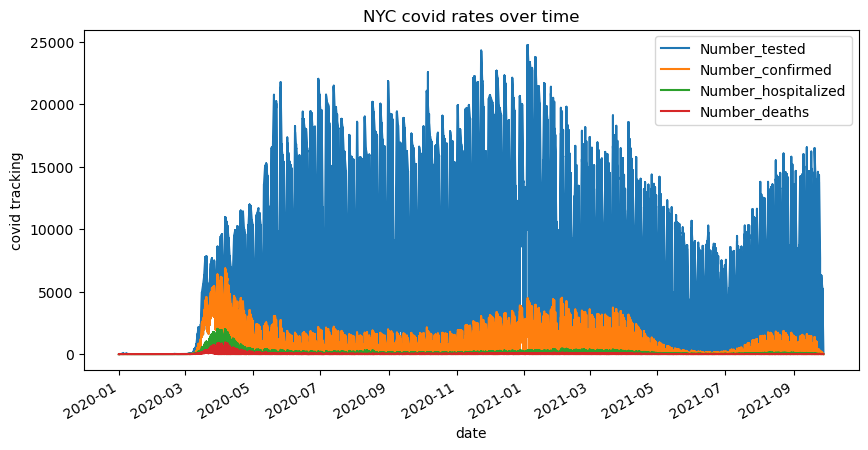

In [64]:
import matplotlib.pyplot as plt

covid_out.plot(x='Sample Date', y=['Number_tested', 'Number_confirmed', 'Number_hospitalized', 'Number_deaths'],figsize=(10,5))

plt.xlabel('date')

plt.ylabel('covid tracking')

plt.title('NYC covid rates over time')

plt.show()

In [65]:
# we want to examine if the waste water spikes in covid before march 2020, and july 2021
# number confirmed is the value to watch correlate with waste water spikes

In [66]:
covid_waste.columns

Index(['Sample Date', 'WRRF Name',
       'Concentration SARS-CoV-2 gene target (N1 Copies/L) ',
       'Per capita SARS-CoV-2 load (N1 copies per day per population)',
       'Population Served, estimated '],
      dtype='object')

In [67]:
covid_waste.head()

,Sample Date,WRRF Name,Concentration SARS-CoV-2 gene target (N1 Copies/L),Per capita SARS-CoV-2 load (N1 copies per day per population),"Population Served, estimated"
0,2020-08-31,26th Ward,389.0,264000.0,318262
1,2020-08-31,Bowery Bay,1204.0,444000.0,894311
2,2020-08-31,Coney Island,304.0,169000.0,647635
3,2020-08-31,Hunts Point,940.0,574000.0,781885
4,2020-08-31,Jamaica Bay,632.0,233000.0,735054


In [68]:
covid_waste = covid_waste.rename(columns={'Concentration SARS-CoV-2 gene target (N1 Copies/L)': 'Concentration', 'Per capita SARS-CoV-2 load (N1 copies per day per population)': 'per_capita'})


In [69]:
covid_waste.head()

,Sample Date,WRRF Name,Concentration SARS-CoV-2 gene target (N1 Copies/L),per_capita,"Population Served, estimated"
0,2020-08-31,26th Ward,389.0,264000.0,318262
1,2020-08-31,Bowery Bay,1204.0,444000.0,894311
2,2020-08-31,Coney Island,304.0,169000.0,647635
3,2020-08-31,Hunts Point,940.0,574000.0,781885
4,2020-08-31,Jamaica Bay,632.0,233000.0,735054


In [70]:
covid_waste = covid_waste.rename(columns={'Concentration SARS-CoV-2 gene target (N1 Copies/L) ': 'Concentration'})


In [71]:
covid_waste.columns

Index(['Sample Date', 'WRRF Name', 'Concentration', 'per_capita',
       'Population Served, estimated '],
      dtype='object')

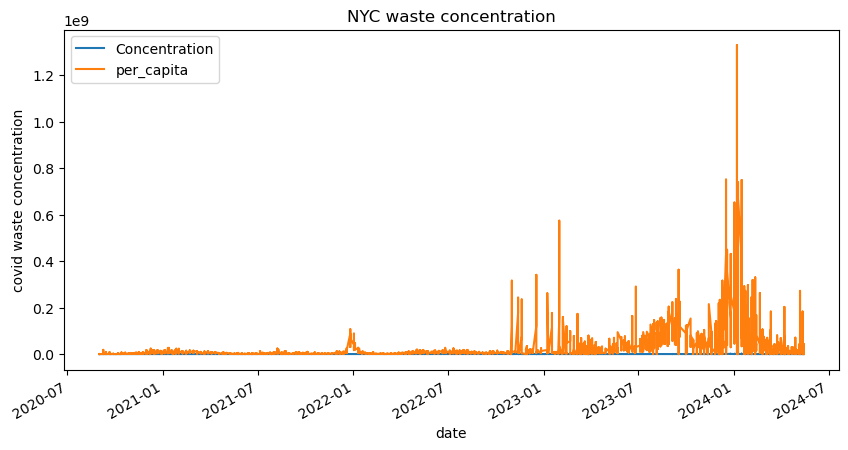

In [72]:
covid_waste.plot(x='Sample Date', y=['Concentration', 'per_capita'], figsize=(10,5))
                 
plt.xlabel('date')

plt.ylabel('covid waste concentration')

plt.title('NYC waste concentration')

plt.show()


In [73]:
#need to get the graphs to similar time ranges
mask = (covid_waste['Sample Date'] > '2020-08-01') & (covid_waste['Sample Date'] <= '2021-09-01')

covid_waste_short= covid_waste.loc[mask]
covid_waste_short.head()

,Sample Date,WRRF Name,Concentration,per_capita,"Population Served, estimated"
0,2020-08-31,26th Ward,389.0,264000.0,318262
1,2020-08-31,Bowery Bay,1204.0,444000.0,894311
2,2020-08-31,Coney Island,304.0,169000.0,647635
3,2020-08-31,Hunts Point,940.0,574000.0,781885
4,2020-08-31,Jamaica Bay,632.0,233000.0,735054


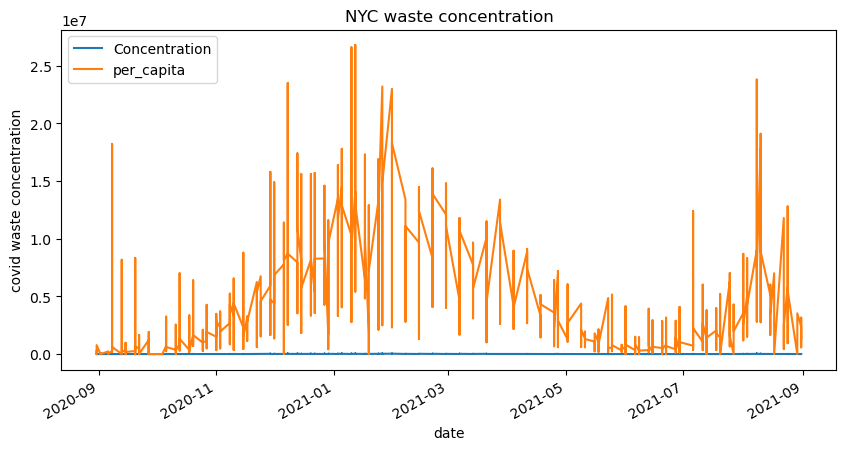

In [74]:

covid_waste_short.plot(x='Sample Date', y=['Concentration', 'per_capita'], figsize=(10,5))
                 
plt.xlabel('date')

plt.ylabel('covid waste concentration')

plt.title('NYC waste concentration')

plt.show()

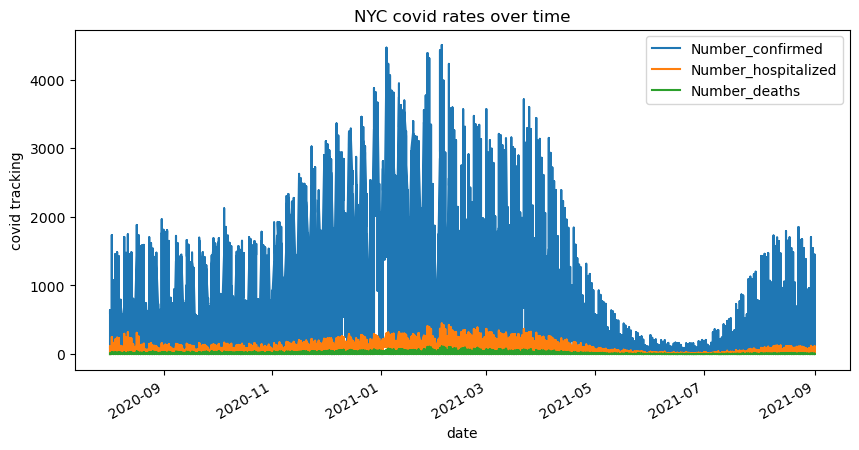

In [75]:
mask2 = (covid_out['Sample Date'] > '2020-08-01') & (covid_out['Sample Date'] <= '2021-09-01')
covid_out_short= covid_out.loc[mask2]
covid_out_short.head()

covid_out_short.plot(x='Sample Date', y=['Number_confirmed', 'Number_hospitalized', 'Number_deaths'],figsize=(10,5))

plt.xlabel('date')

plt.ylabel('covid tracking')

plt.title('NYC covid rates over time')

plt.show()

In [76]:
#it looks like the waste concentration spikes just before the peak in january 2021
#we dont have waste water data until august 2020

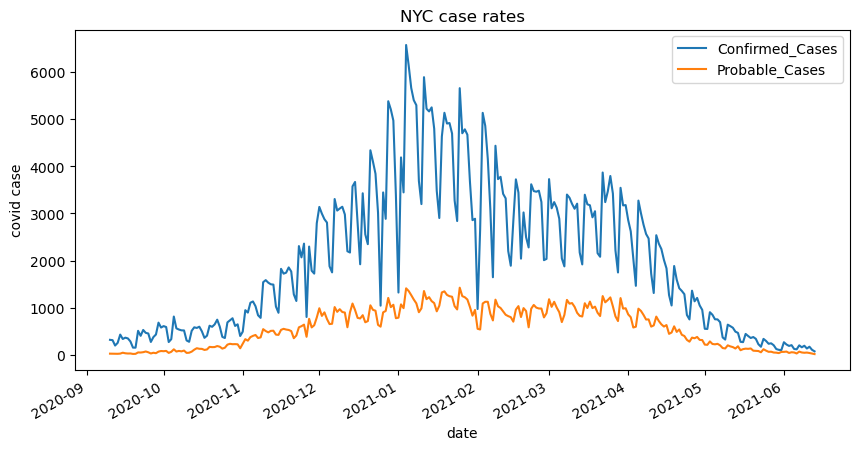

In [77]:
mask3 = (covid_case['Sample Date'] > '2020-08-01') & (covid_case['Sample Date'] <= '2021-09-01')
covid_case_short= covid_case.loc[mask3]
covid_case_short.head()

covid_case.plot(x='Sample Date', y=['Confirmed_Cases', 'Probable_Cases'], figsize=(10,5))
                 
plt.xlabel('date')

plt.ylabel('covid case')

plt.title('NYC case rates')

plt.show()

In [78]:
#it looks like we have dates that match covid_waste_short and covid_out_short
#combine those tables to make a combined graph to run statistical analysis
import seaborn as sns

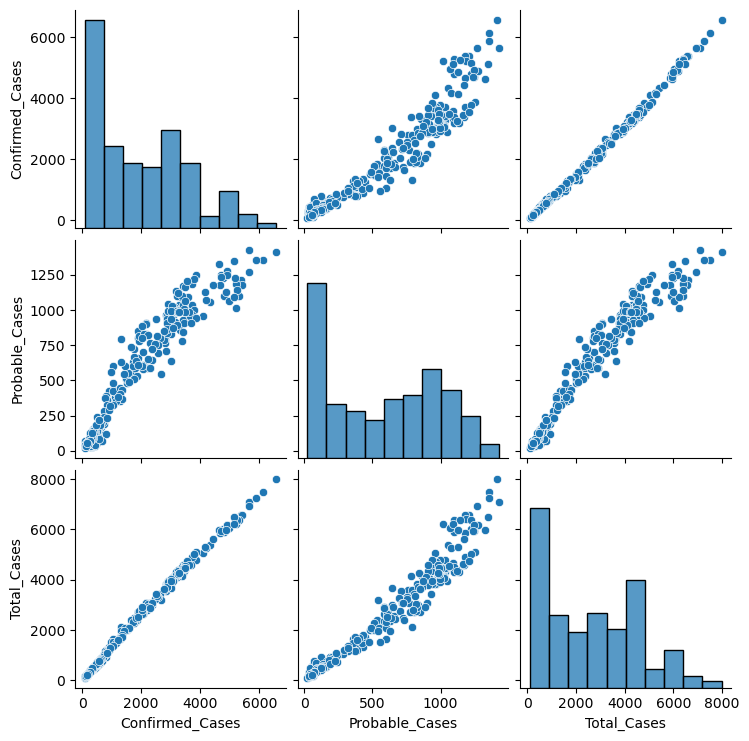

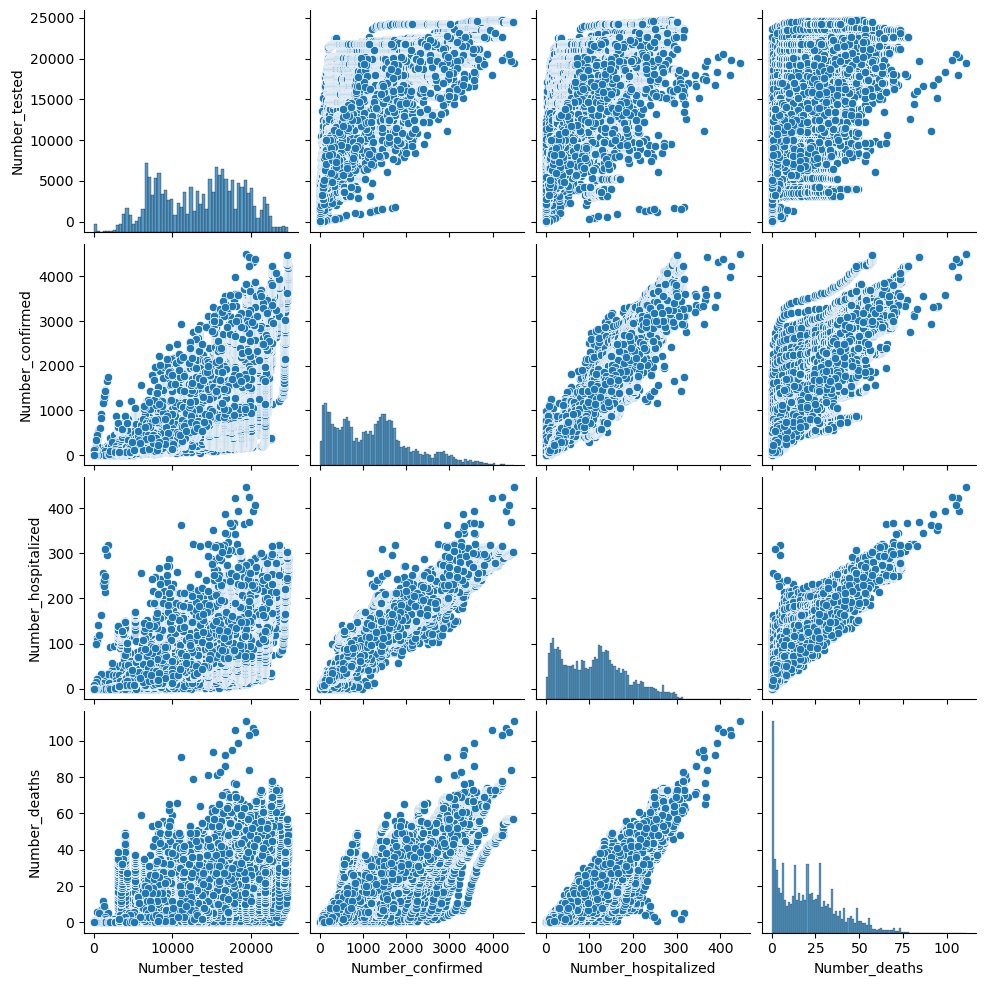

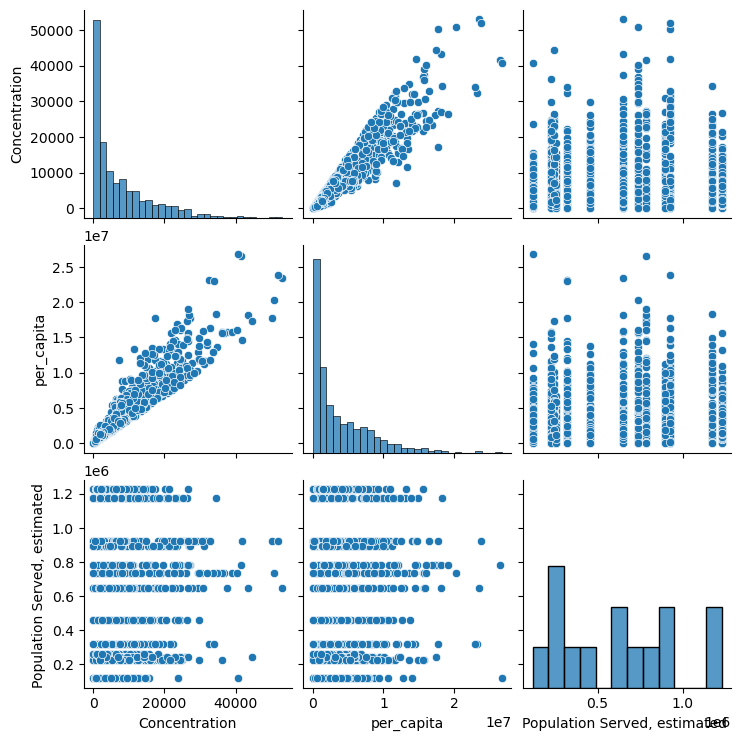

In [79]:
sns.pairplot(covid_case_short)
sns.pairplot(covid_out_short)
sns.pairplot(covid_waste_short)


In [80]:
#sns.pairplot(covid_case_short)- strong correlation with confirmed cases
#sns.pairplot(covid_out_short)- strong correlation with number of hospitalized, number of confirmed
#sns.pairplot(covid_waste_short)- strong correlation wtih number with per_capita and concentration
#concentration and per_capita are skewed. log transformation may help

In [81]:

covid_waste_short['Concentration'] = covid_waste_short['Concentration'].apply(np.log)


/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_2044/3560712822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_waste_short['Concentration'] = covid_waste_short['Concentration'].apply(np.log)


In [82]:

covid_case_short.corr()


/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_2044/1479402532.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covid_case_short.corr()


,Confirmed_Cases,Probable_Cases,Total_Cases
Confirmed_Cases,1.000000,0.952179,0.997852
Probable_Cases,0.952179,1.000000,0.968898
Total_Cases,0.997852,0.968898,1.000000


In [83]:
covid_out_short.corr()


/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_2044/2547405037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covid_out_short.corr()


,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
Number_tested,1.000000,0.676729,0.557647,0.464657
Number_confirmed,0.676729,1.000000,0.958871,0.887382
Number_hospitalized,0.557647,0.958871,1.000000,0.935554
Number_deaths,0.464657,0.887382,0.935554,1.000000


In [84]:
covid_waste_short.corr()

/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_2044/1591736355.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covid_waste_short.corr()


,Concentration,per_capita,"Population Served, estimated"
Concentration,1.000000,0.823678,0.087470
per_capita,0.823678,1.000000,0.082029
"Population Served, estimated",0.087470,0.082029,1.000000


/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_2044/690582756.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid_case_short.corr(), annot=True)


<Axes: >

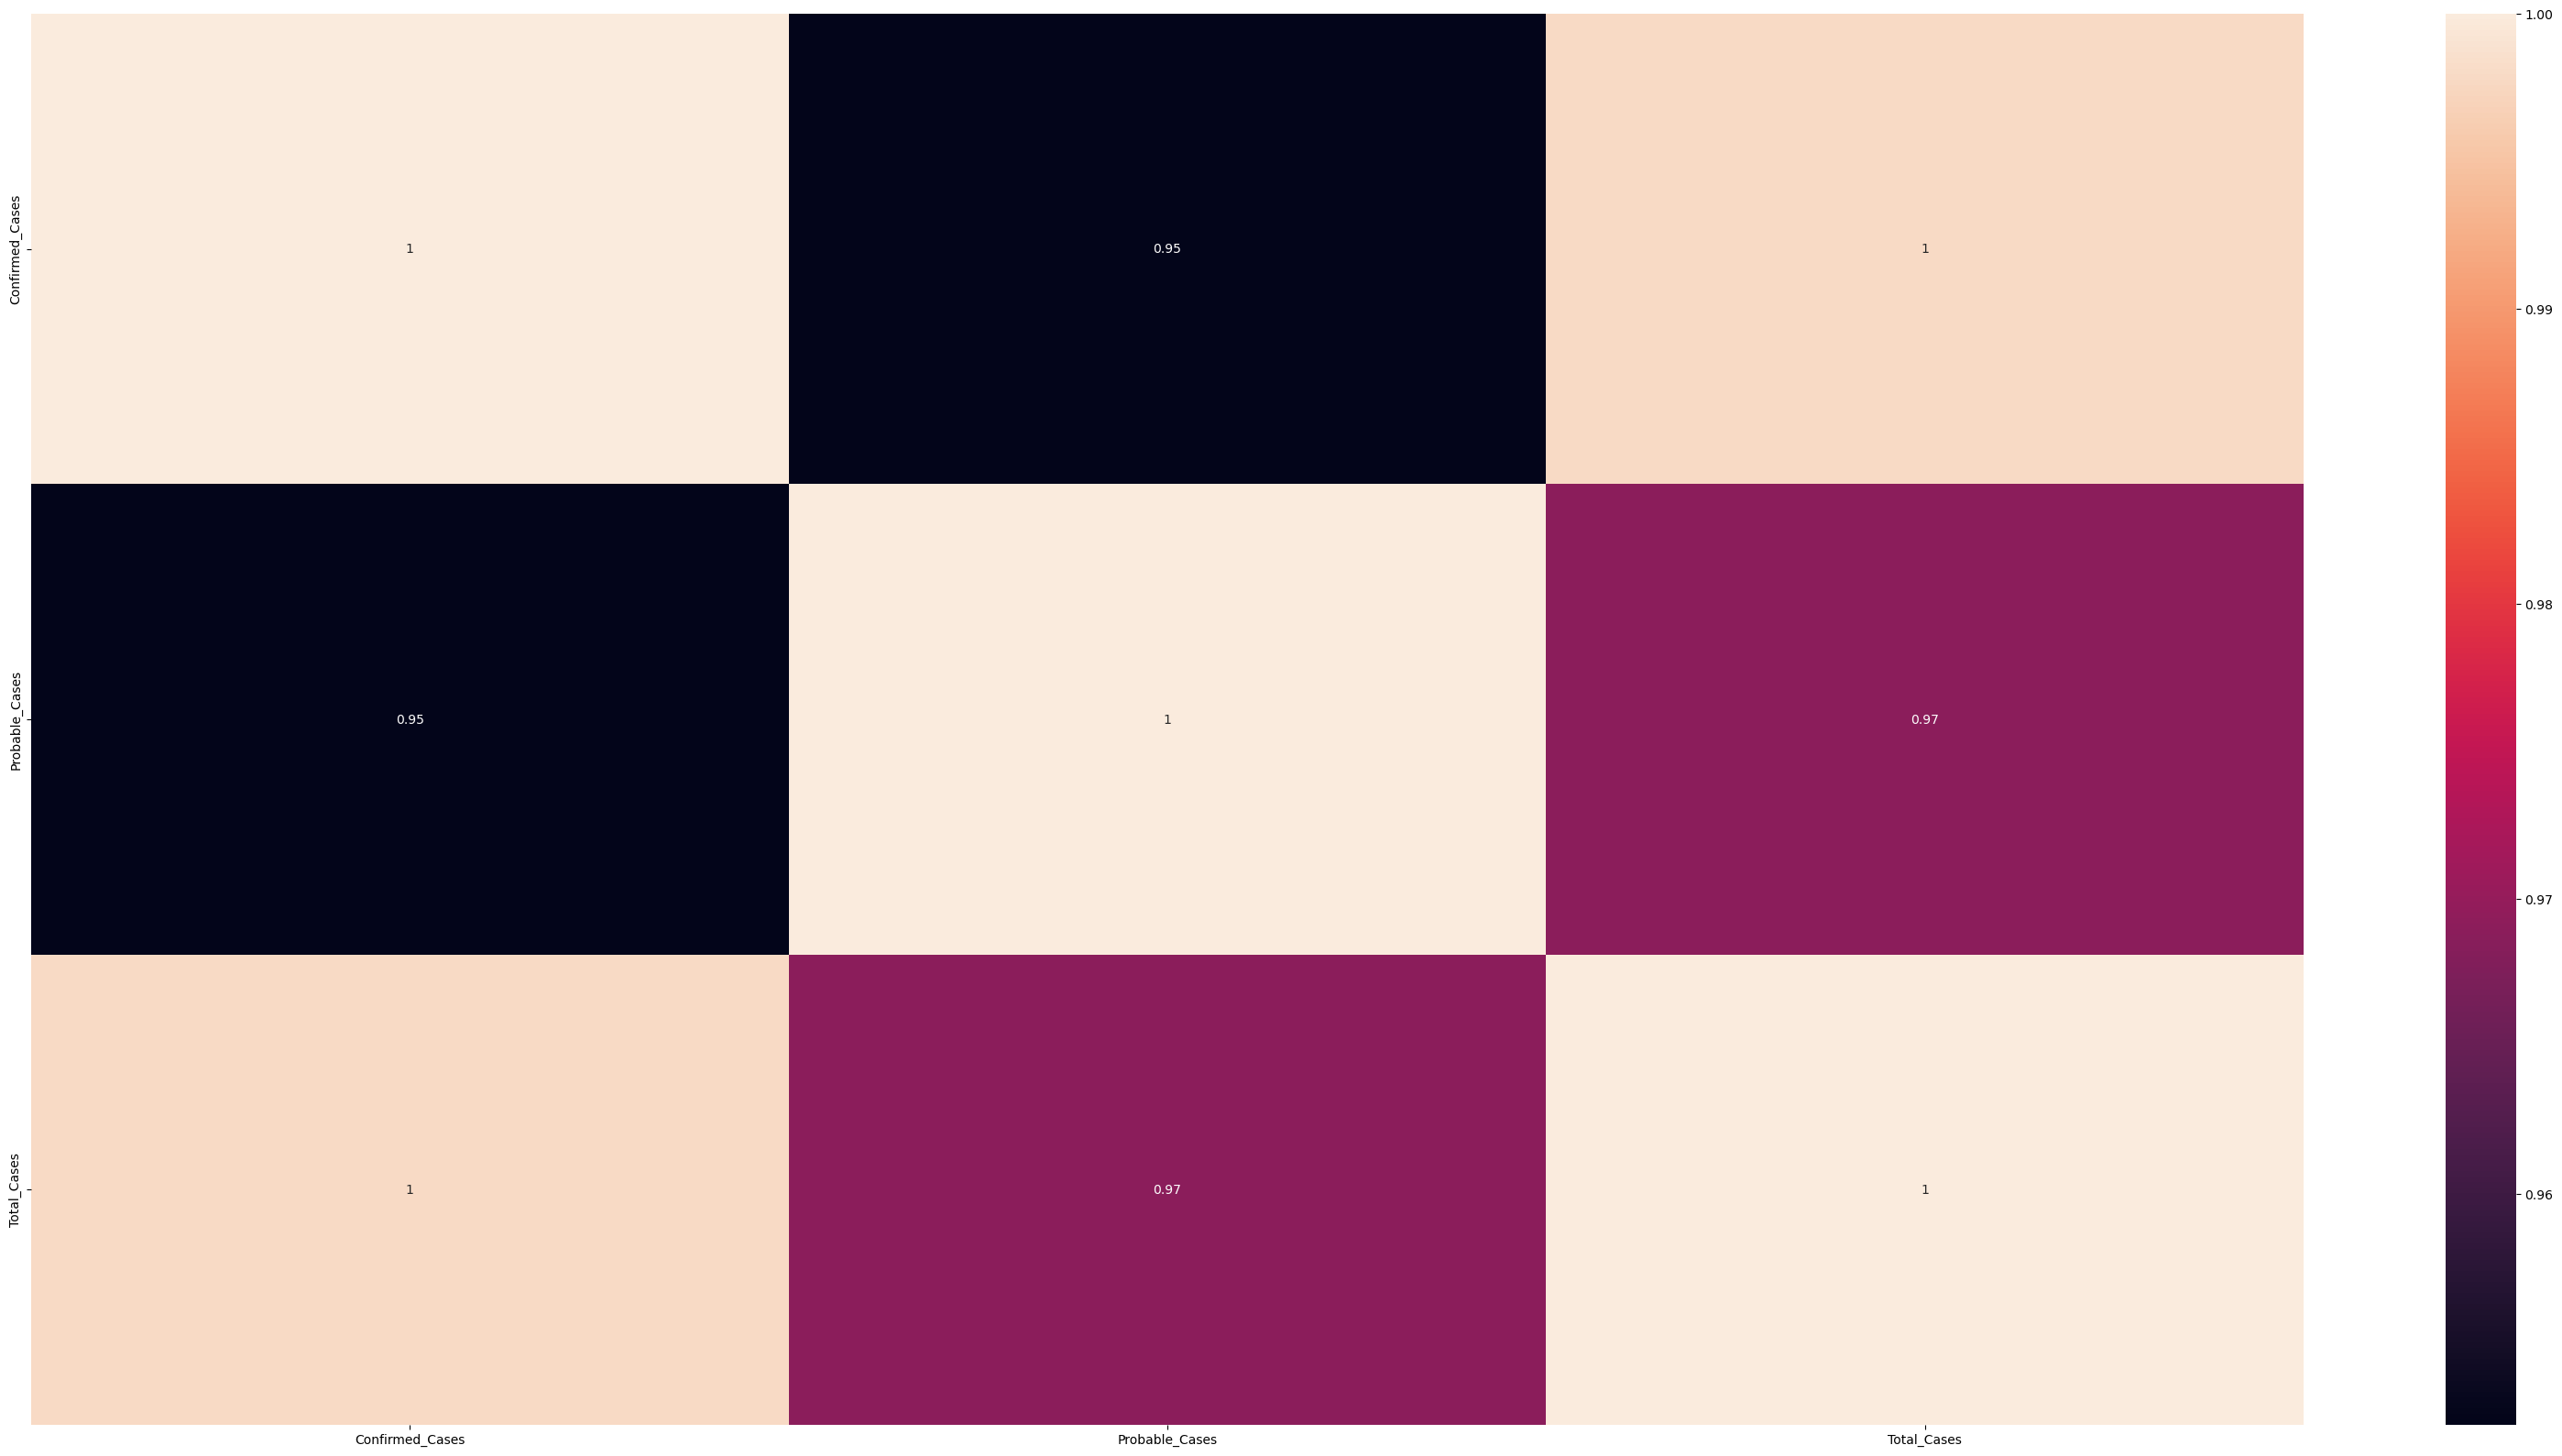

In [85]:
plt.figure(figsize=(40,20))

sns.heatmap(covid_case_short.corr(), annot=True)

/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_2044/2021526726.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid_out_short.corr(), annot=True)


<Axes: >

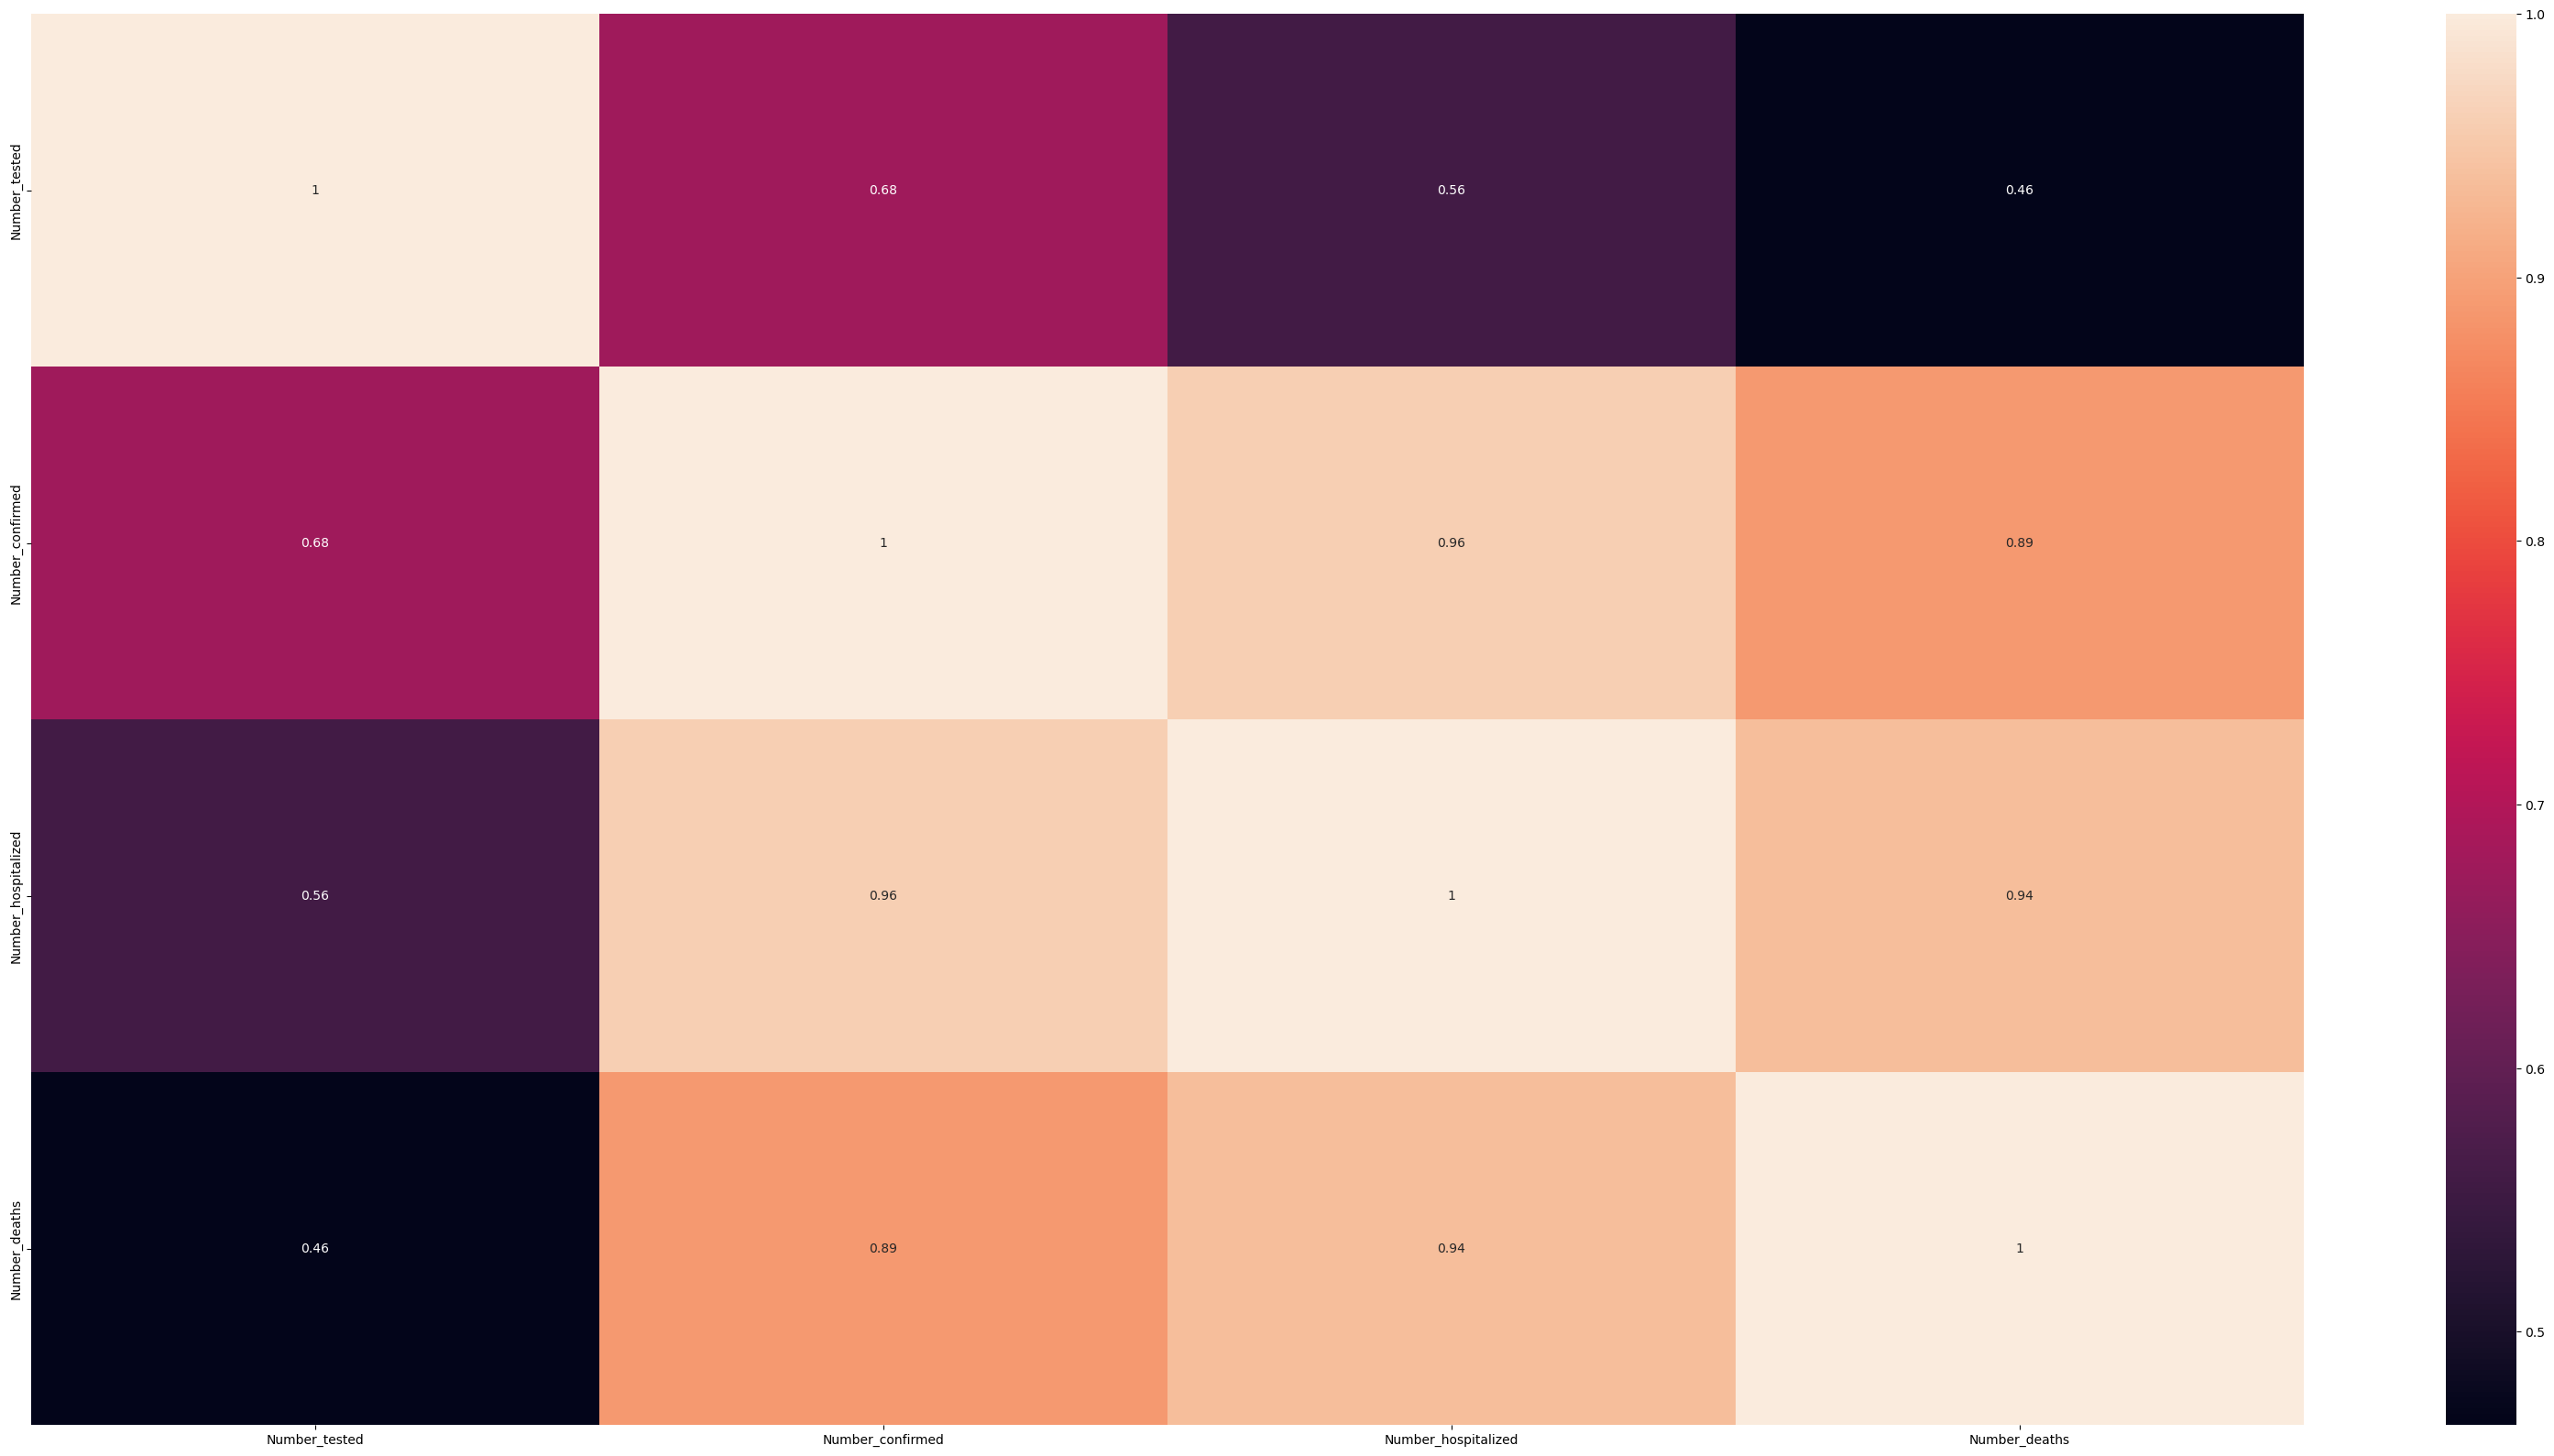

In [86]:
plt.figure(figsize=(40,20))

sns.heatmap(covid_out_short.corr(), annot=True)

/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_2044/782416129.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid_waste_short.corr(), annot=True)


<Axes: >

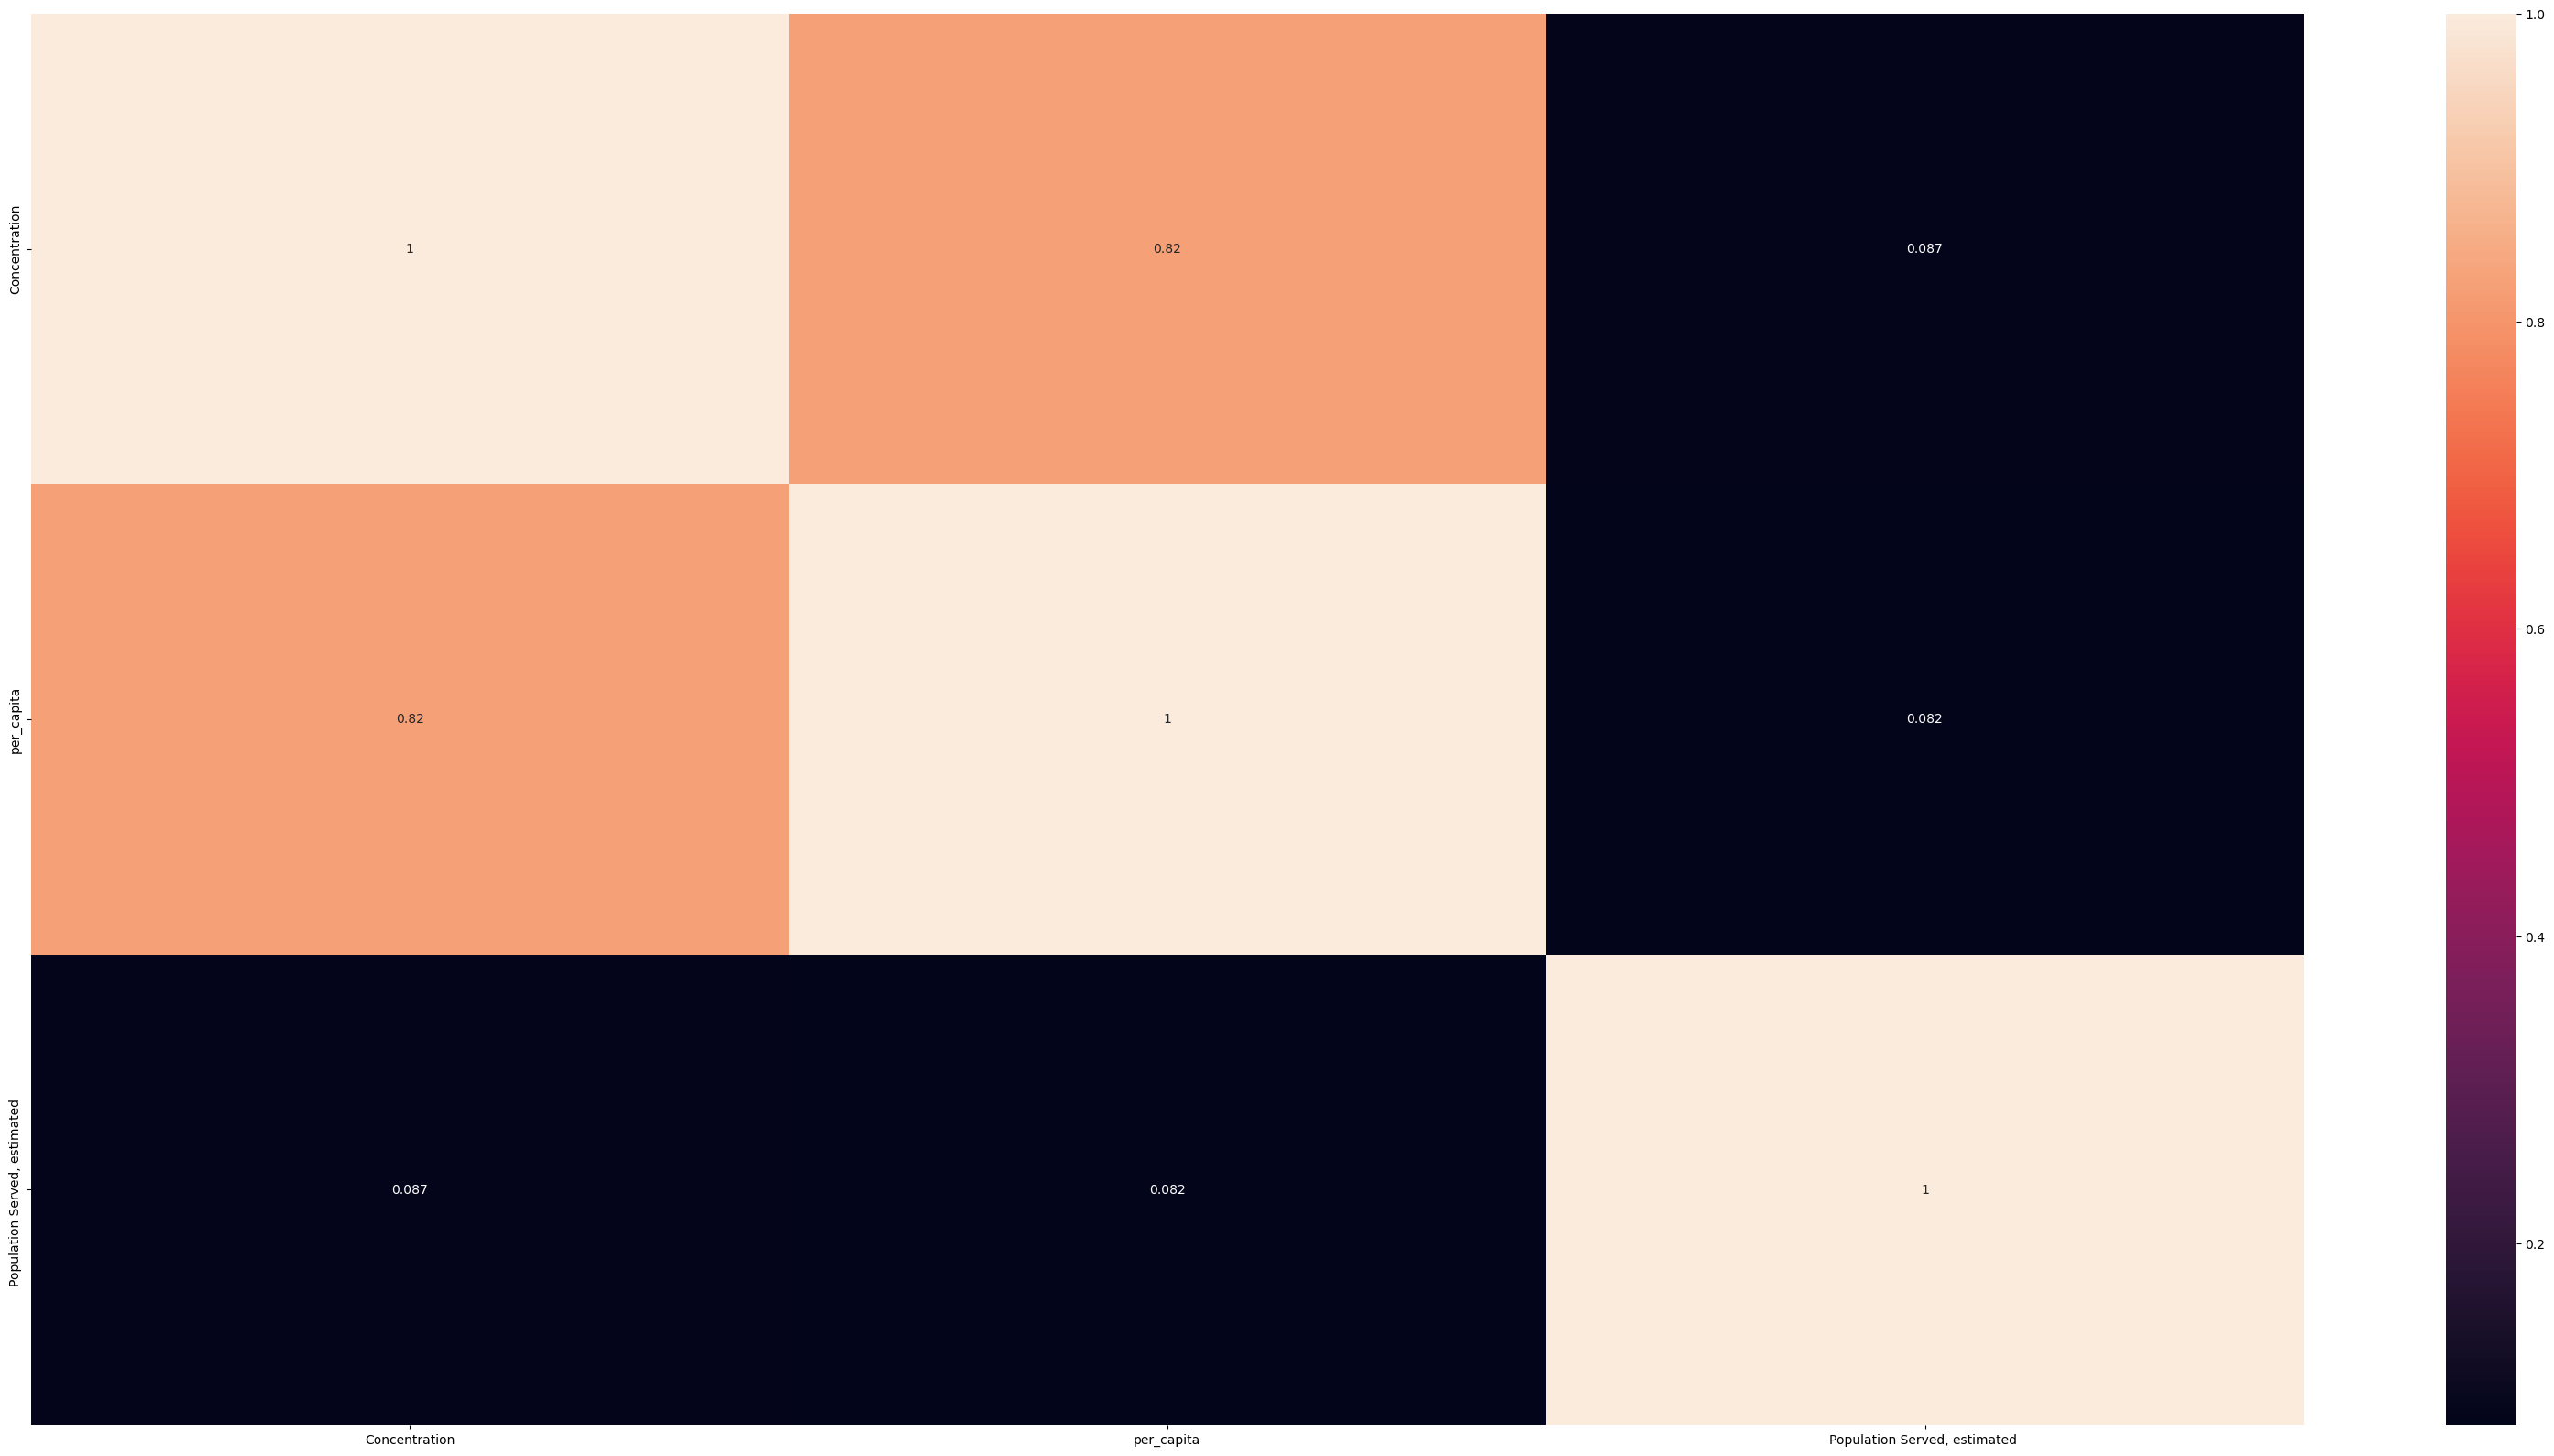

In [87]:
plt.figure(figsize=(40,20))

sns.heatmap(covid_waste_short.corr(), annot=True)

In [88]:
combo_merged=pd.merge(pd.merge(covid_waste_short,covid_out_short,on='Sample Date'),covid_case_short,on='Sample Date')

In [89]:
combo_merged.head()
combo_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229642 entries, 0 to 229641
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Sample Date                    229642 non-null  datetime64[ns]
 1   WRRF Name                      229642 non-null  object        
 2   Concentration                  229642 non-null  float64       
 3   per_capita                     229642 non-null  float64       
 4   Population Served, estimated   229642 non-null  int64         
 5   Number_tested                  229642 non-null  int64         
 6   Number_confirmed               229642 non-null  int64         
 7   Number_hospitalized            229642 non-null  int64         
 8   Number_deaths                  229642 non-null  int64         
 9   Confirmed_Cases                229642 non-null  int64         
 10  Probable_Cases                 229642 non-null  int64         
 11  

/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_2044/1754423545.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combo_merged.corr(), annot=True)


<Axes: >

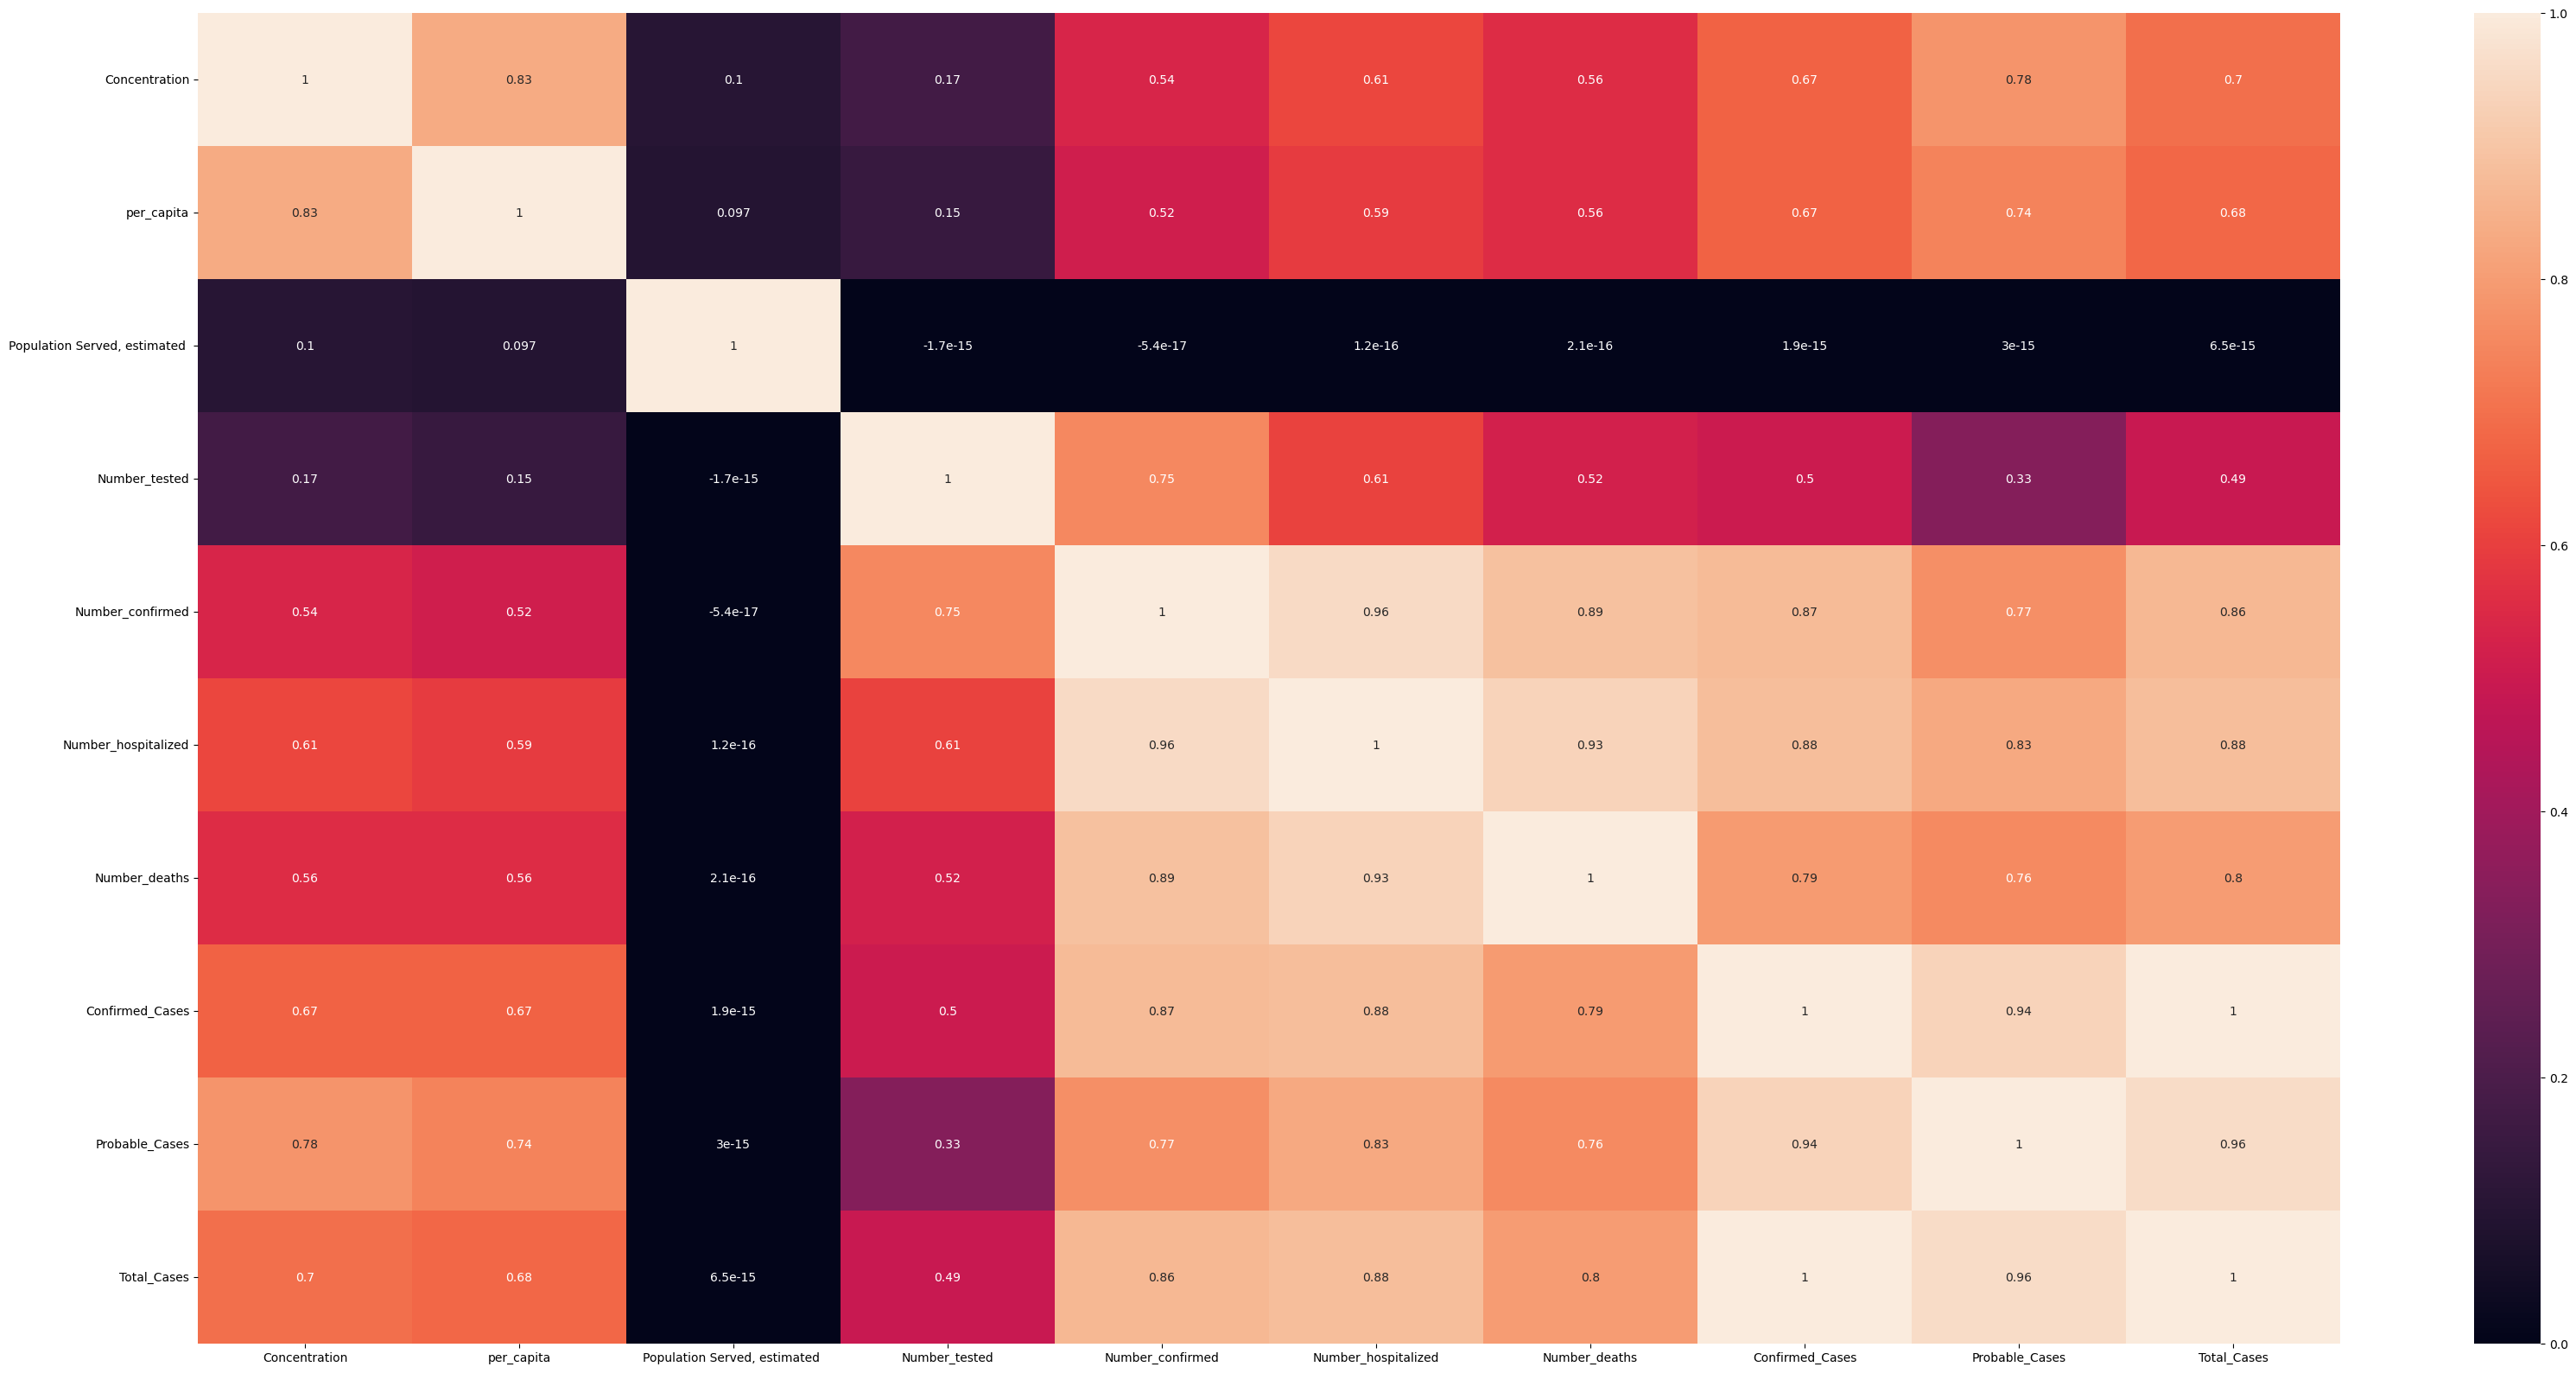

In [90]:
plt.figure(figsize=(40,20))

sns.heatmap(combo_merged.corr(), annot=True)

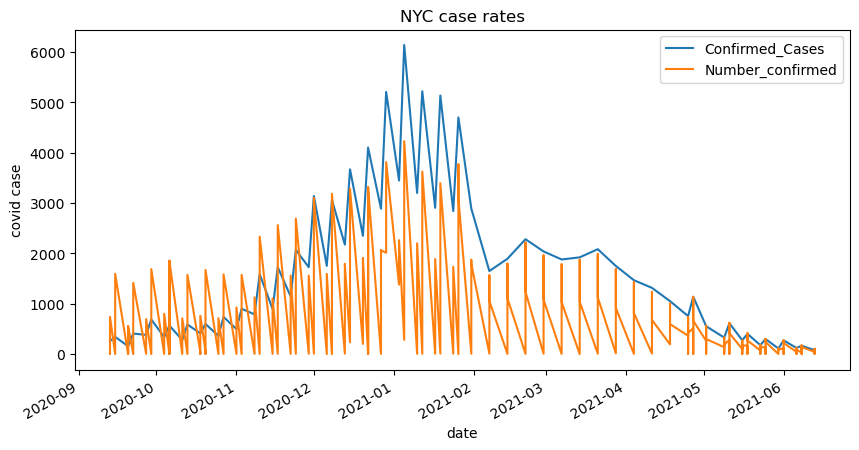

In [91]:
combo_merged.plot(x='Sample Date', y=['Confirmed_Cases', 'Number_confirmed'], figsize=(10,5))
                 
plt.xlabel('date')

plt.ylabel('covid case')

plt.title('NYC case rates')

plt.show()

In [92]:
#we can see that confirmed cases and number of cases correlate the same data across both data sets

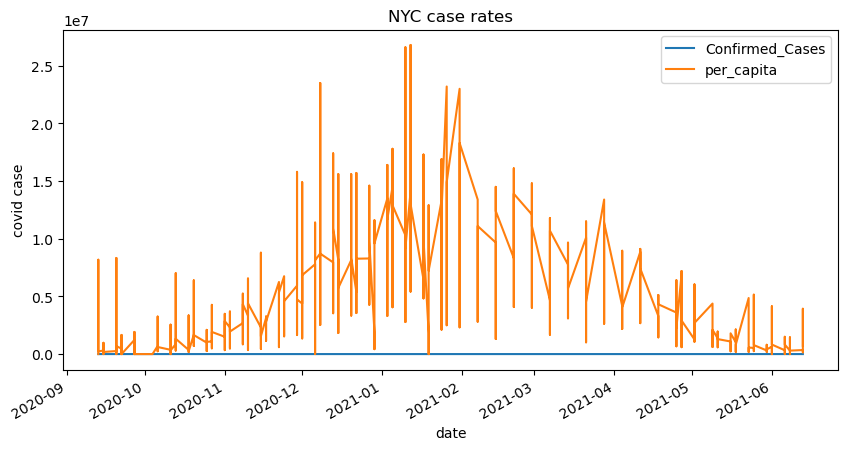

In [93]:
combo_merged.plot(x='Sample Date', y=['Confirmed_Cases', 'per_capita'], figsize=(10,5))
                 
plt.xlabel('date')

plt.ylabel('covid case')

plt.title('NYC case rates')

plt.show()

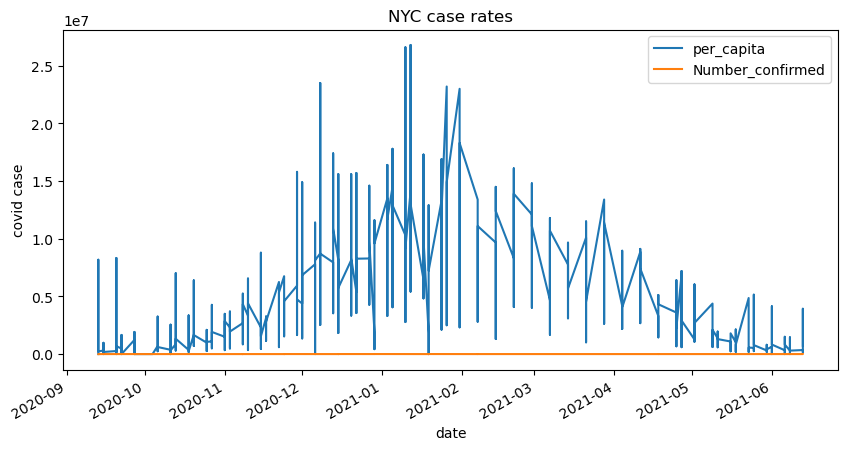

In [94]:
combo_merged.plot(x='Sample Date', y=['per_capita', 'Number_confirmed'], figsize=(10,5))
                 
plt.xlabel('date')

plt.ylabel('covid case')

plt.title('NYC case rates')

plt.show()

In [95]:
#scales are off must try to normalize them
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [96]:
combo_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229642 entries, 0 to 229641
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Sample Date                    229642 non-null  datetime64[ns]
 1   WRRF Name                      229642 non-null  object        
 2   Concentration                  229642 non-null  float64       
 3   per_capita                     229642 non-null  float64       
 4   Population Served, estimated   229642 non-null  int64         
 5   Number_tested                  229642 non-null  int64         
 6   Number_confirmed               229642 non-null  int64         
 7   Number_hospitalized            229642 non-null  int64         
 8   Number_deaths                  229642 non-null  int64         
 9   Confirmed_Cases                229642 non-null  int64         
 10  Probable_Cases                 229642 non-null  int64         
 11  

In [97]:
combo_merged= combo_merged.drop('WRRF Name', axis=1)
combo_merged= combo_merged.drop('Number_tested', axis=1)
combo_merged= combo_merged.drop('Number_hospitalized', axis=1)
combo_merged= combo_merged.drop('Number_deaths', axis=1)
combo_merged= combo_merged.drop('Probable_Cases', axis=1)
combo_merged= combo_merged.drop('Total_Cases', axis=1)
combo_merged= combo_merged.drop('ETLdate', axis=1)
combo_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229642 entries, 0 to 229641
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Sample Date                    229642 non-null  datetime64[ns]
 1   Concentration                  229642 non-null  float64       
 2   per_capita                     229642 non-null  float64       
 3   Population Served, estimated   229642 non-null  int64         
 4   Number_confirmed               229642 non-null  int64         
 5   Confirmed_Cases                229642 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 12.3 MB


In [98]:
scaler = StandardScaler()
scaler.fit_transform(combo_merged)
scaler.fit_transform(combo_merged[['per_capita']])
scaler.fit_transform(combo_merged[['Concentration']])
scaler.fit_transform(combo_merged[['Confirmed_Cases']])

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>)

In [ ]:
combo_merged.plot(x='Sample Date', y=['per_capita', 'Concentration', 'Confirmed_Cases'], figsize=(10,5))
                 
plt.xlabel('date')

plt.ylabel('covid case')

plt.title('NYC case rates')

plt.show()

In [ ]:
combo_merged.plot(x='Sample Date', y=['Concentration', 'per_capita'], figsize=(10,5))
                 
plt.xlabel('date')

plt.ylabel('covid case')

plt.title('NYC case rates')

plt.show()

In [ ]:

#to do 
#explore the case
#borough data not usefull
#combine the tables out short and waste short
#come up with a null hypothesis
#statistical analysis around the hypothesis
